# Tesseract Evaluation - Stringvergleich - psm 3

In diesem Notebook wird untersucht, wie gut die Textextraktion mit Tesseract auf dem Bilddatensatz funktioniert, indem Ground Truth und OCR-Text jeweils als Strings verglichen werden.  

Hier und den weiteren notebooks wird mit der tesseract version 5.5.0 gearbeitet



#### 1. Textextraktion mit tesseract

#### 2. Evaluation 
    2.1 Stringvergleich (Ähnlichkeit)
    2.2 Berechnung Character Accuracy 
    2.3 Berechnung Word Accuracy
    2.4 Berechnung CER und WER
---

#### TEST: Textextraktion aus einem Bild

In [27]:
import pytesseract
from PIL import Image


img = Image.open("../../data/images/insta_images/0001.jpg")

text = pytesseract.image_to_string(img, lang='deu')  # 'deu' für Deutsch

print(text)


ÄCHCAFE—&
aHTSFELER

DIENSTAG 21.12.
OLOF-PALME ZENTRUM —
19 UHR

WIR FREUEN UNS AUF EUCH!



#### Laden des Dataframes mit ground truth 

In [105]:
import pandas as pd

df = pd.read_csv("../../data/image_data_with_groundtruth.csv")
df.head(2)


,original name,file_name,category,URL,Plattform,channel name,ground_truth,OCR_ChatGPT4
0,Weihnachtsfeier im Sprachcafé! Wir laden euch ...,0001.jpg,noisy,https://www.instagram.com/p/CXTzhTAs4O2/?img_i...,Instagram,sprachcafe.berlin,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,Sprachcafe Weihnachtsfeier Dienstag 21.12. Olo...
1,Dresden 8.8. 16 Uhr #demokratischerwiderstand ...,0002.jpg,noisy,https://www.instagram.com/p/CDbyO8SnQ9Z/,Instagram,nichtohneuns,SCHLIESST EUCH AN! ET Video & Content nichtohn...,SCHLIESST EUCH AN! KUNDGEBUNG #SOLIDARITÄT MIT...


---
### 1. Textextraktion 
#### Anwenden von Tesseract auf gesamtem Datensatz
Monitoring von Ressourcen-Verbrauch  
Der extrahierte Text wird als String ausgegeben

In [106]:
import pytesseract
from PIL import Image
import os

import sys # ermöglicht Zugriff auf übergeordnetes Verzeichnis
sys.path.append(os.path.abspath(".."))
from ressourcen_monitor import monitor

IMAGE_PATH_BASE = os.path.join("../../data/images/insta_images")


def extract_text_from_image(image_path):
    try:
        img = Image.open(image_path)
        text = pytesseract.image_to_string(img, lang='deu')
        return text.strip() 
    except Exception as e:
        return f"Fehler: {e}"


def get_ocr_text(name):
    image_path = os.path.join(IMAGE_PATH_BASE, name)
    return extract_text_from_image(image_path)


# OCR auf alle Bilder im DataFrame anwenden - 
# so :  - df["ocr_tesseract"] = df["name"].apply(get_ocr_text) - nicht möglich, wenn man wrapper funktion nutzen will
# kann nur auf/für funktion angewendet werden


@monitor(full_name="Tesseract OCR") # kann nur bei Funktionen angewendet werden
def apply_ocr():
    df["ocr_tesseract"] = df["file_name"].apply(get_ocr_text)  #The apply() method allows you to apply a function along one of the axis of the DataFrame


In [107]:
apply_ocr()

[codecarbon WARNING @ 11:52:04] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 11:52:04] Error while trying to count physical CPUs: [Errno 2] No such file or directory: 'lscpu'. Defaulting to 1.
[codecarbon INFO @ 11:52:04] [setup] RAM Tracking...
[codecarbon INFO @ 11:52:04] [setup] CPU Tracking...
[codecarbon WARNING @ 11:52:04] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 11:52:04] CPU Model on constant consumption mode: Apple M1 Max
[codecarbon WARNING @ 11:52:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 11:52:04] [setup] GPU Tracking...
[codecarbon INFO @ 11:52:04] No GPU found.
[codecarbon INFO @ 11:52:04] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global const


--- Ressourcenbericht für 'Tesseract OCR' ---
CPU-Zeit:     2.27 s
RAM genutzt:  14.98 MB
Laufzeit:     124.35 s
CO₂-Ausstoß:  0.000001 kg
-------------------------------------------




##### --- Ressourcenbericht für 'Tesseract OCR' ---  
##### CPU-Zeit:     2.27 s  
##### RAM genutzt:  14.98 MB  
##### Laufzeit:     124.35 s  
##### CO₂-Ausstoß:  0.000001 kg  
##### -------------------------------------------

In [108]:
df[["file_name", "category", "ground_truth", "ocr_tesseract" ]].head(5)


,file_name,category,ground_truth,ocr_tesseract
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,#SOLIDARITÄT MIT ALLEN!\n\nBERICHTE: WIE WAR D...
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,Ö\n\nA JEDEIR IST o-LS%WILLKQMMENLÄ\n\nS
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,Aul\nDEMO GEGEN GENTRIFIZIERUNG\nNa 2022 / 15:...


#### Erstellen einer CSV mit dem OCR-Output von Tesseract für weitere Analysen

In [109]:
df.to_csv("../../data/OCR/tesseract/OCR_tesseract_01.csv", index=False)


In [110]:
df = pd.read_csv("../../data/OCR/tesseract/OCR_tesseract_01.csv")
df.head(1)

,original name,file_name,category,URL,Plattform,channel name,ground_truth,OCR_ChatGPT4,ocr_tesseract
0,Weihnachtsfeier im Sprachcafé! Wir laden euch ...,0001.jpg,noisy,https://www.instagram.com/p/CXTzhTAs4O2/?img_i...,Instagram,sprachcafe.berlin,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,Sprachcafe Weihnachtsfeier Dienstag 21.12. Olo...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...


In [111]:
df.drop( ["original name", "URL", "Plattform", "channel name", "OCR_ChatGPT4"], axis=1, inplace=True)

In [112]:
df.head(1)

,file_name,category,ground_truth,ocr_tesseract
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...


In [54]:
df.shape

(200, 4)

In [113]:
# Datei speichern
df.to_csv("../../data/OCR/tesseract/OCR_tesseract_01.csv", index=False)

In [114]:
# laden der Datei im df
df = pd.read_csv("../../data/OCR/tesseract/OCR_tesseract_01.csv")
df.head(1)

,file_name,category,ground_truth,ocr_tesseract
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...


#### Untersuchung auf NAN Werte 

In [115]:
df['ocr_tesseract'].isna().sum()


22

In [116]:
df[df['ocr_tesseract'].isna()]['category'].unique()


array(['noisy', 'fancy', 'photo', 'simple', 'skewed'], dtype=object)

In [117]:
df[df['ocr_tesseract'].isna()].groupby('category').size().sort_values(ascending=False)



category
fancy     7
noisy     5
skewed    5
simple    3
photo     2
dtype: int64

---

### 2. Evaluation

#### 2.1 Evaluation mittels Stringvergleich (Vergleich OCR-Text und Ground Truth)

Es wird ein einfacher Stringvergleich angwendet.   
Mit Hilfe des Mouduls "difflib" wird die Ähnlichkeit der Strings überprüft. Hierbei wird eine Zahl zwischen 0 und 1 ausgegeben - je höher die Zahl, desto ähnlicher sind sich Texte.

In [118]:
from difflib import SequenceMatcher

def text_similarity(ocr_tesseract, ground_truth):
    ratio = SequenceMatcher(ocr_tesseract, ground_truth).ratio()
    return ratio

def calculate_similarities(ocr_series, gt_series):
    return list(map(text_similarity, ocr_series, gt_series))

# Anwendung
df['similarity'] = calculate_similarities(df['ocr_tesseract'], df['ground_truth'])



In [119]:
df.head(2)

,file_name,category,ground_truth,ocr_tesseract,similarity
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...,0.0
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,#SOLIDARITÄT MIT ALLEN!\n\nBERICHTE: WIE WAR D...,0.0


In [120]:
df[df['similarity']> 0.0].groupby('category').size()

Series([], dtype: int64)

##### ----> ein einfacher Stringvergleich liefert kein Ergebnis - die Strings sind zu unterschiedlich

##### OCR Output bereinigen (Normalisieren) 
die Strings werden von doppelten Leerzeichen und Umbrüchen bereinigt, damit sie in der Struktur dem ground truth gleichen


In [121]:
# Funktion normalize_text und Test auf einzelnem Text

#def normalize_text(ocr_tesseract):
#    return ' '.join(ocr_tesseract.split())  # entfernt nur doppelte Leerzeichen/Zeilenumbrüche

# NAN Werte im df werden in leeren String umgewandelt
def normalize_text(ocr_tesseract):
    return ' '.join(str(ocr_tesseract).split()) if pd.notna(ocr_tesseract) else ''


ocr = df["ocr_tesseract"].iloc[0]
print(ocr)
ocr_normalized = normalize_text(ocr)

print(ocr_normalized)

ÄCHCAFE—&
aHTSFELER

DIENSTAG 21.12.
OLOF-PALME ZENTRUM —
19 UHR

WIR FREUEN UNS AUF EUCH!
ÄCHCAFE—& aHTSFELER DIENSTAG 21.12. OLOF-PALME ZENTRUM — 19 UHR WIR FREUEN UNS AUF EUCH!


In [122]:
# Test Ground TRuth
gt = df["ground_truth"].iloc[0]
print(gt)
gt_normalized = normalize_text(gt)

print(gt_normalized)

SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLOF-PALME ZENTRUM 19 UHR WIR FREUEN UNS AUF EUCH!
SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLOF-PALME ZENTRUM 19 UHR WIR FREUEN UNS AUF EUCH!


In [123]:
# auf ganzen Datensatz anwenden normalisierten OCR-Text in eigener Spalte speichern
def apply_normalize_text(row):
    return normalize_text(row.ocr_tesseract)

df["normalized_ocr_tesseract"] = df.apply(apply_normalize_text, axis=1)

In [124]:
df.head(1)

,file_name,category,ground_truth,ocr_tesseract,similarity,normalized_ocr_tesseract
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...,0.0,ÄCHCAFE—& aHTSFELER DIENSTAG 21.12. OLOF-PALME...


#### Vergleich bereinigter OCR-Text mit ground truth 

es wird erneut ein Stringvergleich durchgeführt, um zu sehen, ob die Ergebnisse sich verbessern

In [125]:
from difflib import SequenceMatcher

def text_similarity(ocr_tesseract, ground_truth):
    ratio = SequenceMatcher(ocr_tesseract, ground_truth).ratio()
    return ratio

def apply_text_similarity(row):
    return text_similarity(row.normalized_ocr_tesseract, row.ground_truth)

df["similarity02"] = df.apply(apply_text_similarity, axis=1)

In [126]:
df.head(3)

,file_name,category,ground_truth,ocr_tesseract,similarity,normalized_ocr_tesseract,similarity02
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...,0.0,ÄCHCAFE—& aHTSFELER DIENSTAG 21.12. OLOF-PALME...,0.0
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,#SOLIDARITÄT MIT ALLEN!\n\nBERICHTE: WIE WAR D...,0.0,#SOLIDARITÄT MIT ALLEN! BERICHTE: WIE WAR DIE ...,0.0
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...,0.0,Gedenkkundgebung und antifaschistische Demonst...,0.0


In [127]:
df[df['similarity02']> 0.0].groupby('category').size()

Series([], dtype: int64)

##### ----> die Ergebnisse haben sich nicht verändert, ein einfacher Stringvergleich liefert kein Ergebnis - die Strings sind weiterhin zu unterschiedlich

#### 2.2 Character Accuracy 

dabei wird die Levenshtein Distance, quasi die absoluten Fehler, mit der Länge des Strings im ground truth ins Verhältnis gesetzt, um eine bessere Einschätzung zur Accuracy zu treffen

In [128]:
print(type("ground_truth"))
print(type("ocr_tesseract"))

<class 'str'>
<class 'str'>


In [129]:
# Ersetzen der NAN Werte durch leeren String, da sonst keine Berechnung möglich ( Fehlermeldung, weil anderer Datentyp

df["ocr_tesseract"] = df["ocr_tesseract"].fillna("")


In [130]:
df['ocr_tesseract'].isna().sum()

0

In [131]:
import Levenshtein

def character_accuracy(ocr_text, ground_truth):
    distance = Levenshtein.distance(ocr_text, ground_truth)
    max_len = len(ground_truth) 
    return 1 - (distance / max_len)

df["char_accuracy02"] = df.apply(
    lambda row: character_accuracy(row["normalized_ocr_tesseract"], row["ground_truth"]),
    axis=1
)

df["char_accuracy"] = df.apply(
    lambda row: character_accuracy(row["ocr_tesseract"], row["ground_truth"]),
    axis=1
)



In [132]:
df.head()

,file_name,category,ground_truth,ocr_tesseract,similarity,normalized_ocr_tesseract,similarity02,char_accuracy02,char_accuracy
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...,0.0,ÄCHCAFE—& aHTSFELER DIENSTAG 21.12. OLOF-PALME...,0.0,0.838710,0.784946
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,#SOLIDARITÄT MIT ALLEN!\n\nBERICHTE: WIE WAR D...,0.0,#SOLIDARITÄT MIT ALLEN! BERICHTE: WIE WAR DIE ...,0.0,0.585227,0.556818
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...,0.0,Gedenkkundgebung und antifaschistische Demonst...,0.0,0.520124,0.486068
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,Ö\n\nA JEDEIR IST o-LS%WILLKQMMENLÄ\n\nS,0.0,Ö A JEDEIR IST o-LS%WILLKQMMENLÄ S,0.0,0.151899,0.145570
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,Aul\nDEMO GEGEN GENTRIFIZIERUNG\nNa 2022 / 15:...,0.0,Aul DEMO GEGEN GENTRIFIZIERUNG Na 2022 / 15:00...,0.0,0.338235,0.323529


In [133]:
# Prüfung auf unterschiedliche Werte
unterschiede = (df["char_accuracy"] != df["char_accuracy02"]).sum()
print(f"Anzahl unterschiedlicher Werte zwischen char accuracy (normalisierter und nicht normalsisierter Text): {unterschiede}")

Anzahl unterschiedlicher Werte zwischen char accuracy (normalisierter und nicht normalsisierter Text): 171


In [134]:
char_accuracy_mean = df["char_accuracy"].mean()
print(f"char_accuracy_mean: {char_accuracy_mean * 100:.2f}%")


char_accuracy_mean: 43.32%


In [135]:
char_accuracy_mean = df["char_accuracy02"].mean()
print(f"char_accuracy_mean (normalsisiert): {char_accuracy_mean * 100:.2f}%")


char_accuracy_mean (normalsisiert): 46.41%


##### ---> Char Accuracy hat sich durch Normalisieren erhöht

In [136]:
avg_accuracy_per_category = df.groupby("category")["char_accuracy02"].mean() *100
print("Durchschnittliche Char Accuracy pro Bildtyp (normalisierter OCR-Text):")
print((avg_accuracy_per_category).sort_values(ascending=False))


Durchschnittliche Char Accuracy pro Bildtyp (normalisierter OCR-Text):
category
simple    62.467354
photo     42.567337
fancy     40.257255
noisy     38.666646
skewed    33.406731
Name: char_accuracy02, dtype: float64


#### 2.3 Word Accuracy 

In [137]:
def word_accuracy(ocr_text, ground_truth):
    ocr_words = ocr_text.split()
    gt_words = ground_truth.split()
    matches = sum(1 for p, t in zip(ocr_words, gt_words) if p == t) # zip paart Wörter nach ihrer Position
    max_len = len(gt_words)
    return matches / max_len


In [138]:
df["word_accuracy"] = df.apply(
    lambda row: word_accuracy(row["ocr_tesseract"], row["ground_truth"]),
    axis=1
)

df["word_accuracy02"] = df.apply(
    lambda row: word_accuracy(row["normalized_ocr_tesseract"], row["ground_truth"]),
    axis=1
)


In [139]:
df.head()

,file_name,category,ground_truth,ocr_tesseract,similarity,normalized_ocr_tesseract,similarity02,char_accuracy02,char_accuracy,word_accuracy,word_accuracy02
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...,0.0,ÄCHCAFE—& aHTSFELER DIENSTAG 21.12. OLOF-PALME...,0.0,0.838710,0.784946,0.307692,0.307692
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,#SOLIDARITÄT MIT ALLEN!\n\nBERICHTE: WIE WAR D...,0.0,#SOLIDARITÄT MIT ALLEN! BERICHTE: WIE WAR DIE ...,0.0,0.585227,0.556818,0.000000,0.000000
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...,0.0,Gedenkkundgebung und antifaschistische Demonst...,0.0,0.520124,0.486068,0.000000,0.000000
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,Ö\n\nA JEDEIR IST o-LS%WILLKQMMENLÄ\n\nS,0.0,Ö A JEDEIR IST o-LS%WILLKQMMENLÄ S,0.0,0.151899,0.145570,0.000000,0.000000
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,Aul\nDEMO GEGEN GENTRIFIZIERUNG\nNa 2022 / 15:...,0.0,Aul DEMO GEGEN GENTRIFIZIERUNG Na 2022 / 15:00...,0.0,0.338235,0.323529,0.000000,0.000000


In [140]:
word_accuracy_mean = df["word_accuracy"].mean()
print(f"word_accuracy_mean: {word_accuracy_mean * 100:.2f}%")

word_accuracy_mean: 11.06%


In [141]:
word_accuracy_mean02 = df["word_accuracy02"].mean()
print(f"word_accuracy_mean: {word_accuracy_mean * 100:.2f}%")

word_accuracy_mean: 11.06%


##### ---> die durchschnittliche Word Accuracy liegt bei 11.06% (kein Unterschied zw. normalized OCR-Text und not normalized OCR-Text)

In [142]:
avg_word_accuracy_per_category = df.groupby("category")["word_accuracy02"].mean() *100
print("Durchschnittliche Word Accuracy pro Bildtyp (normalisierter OCR-Text):")
print((avg_word_accuracy_per_category).sort_values(ascending=False))

Durchschnittliche Word Accuracy pro Bildtyp (normalisierter OCR-Text):
category
simple    23.641011
skewed     6.562630
noisy      6.242214
fancy      4.382897
photo      2.391689
Name: word_accuracy02, dtype: float64


In [143]:
avg_word_accuracy_per_category = df.groupby("category")["word_accuracy"].mean() *100
print("Durchschnittliche Word Accuracy pro Bildtyp (original OCR-Text):")
print((avg_word_accuracy_per_category).sort_values(ascending=False))

Durchschnittliche Word Accuracy pro Bildtyp (original OCR-Text):
category
simple    23.641011
skewed     6.562630
noisy      6.242214
fancy      4.382897
photo      2.391689
Name: word_accuracy, dtype: float64


In [156]:
df.to_csv("../../data/OCR/tesseract/tesseract_results_string_psm3.csv", index=False)

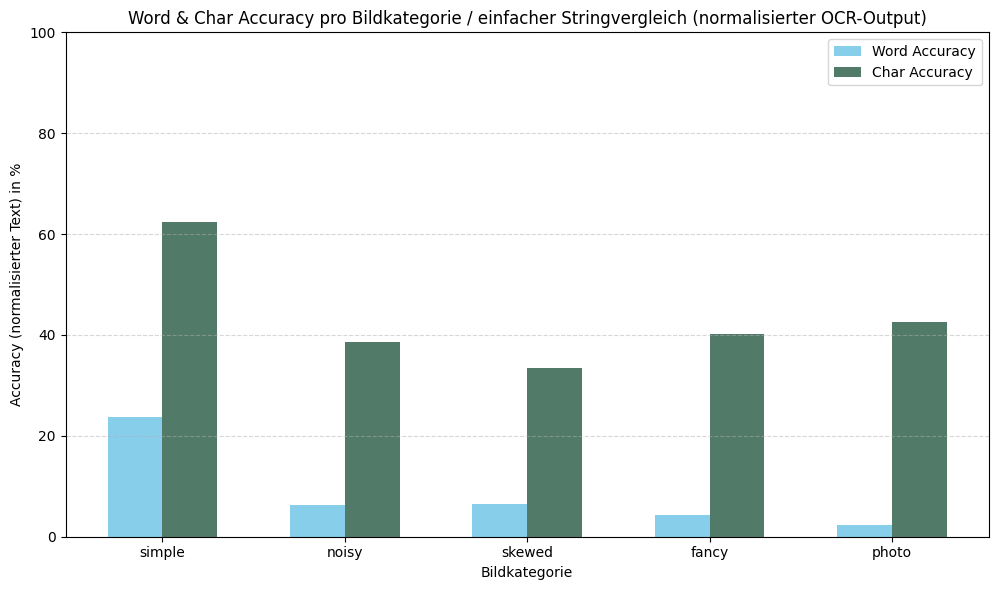

In [145]:
import matplotlib.pyplot as plt
import pandas as pd


categories = ['simple', 'noisy', 'skewed', 'fancy', 'photo']

word_accuracy = [23.641011, 6.242214, 6.562630, 4.382897, 2.391689]
char_accuracy = [62.467354, 38.666646, 33.406731, 40.257255, 42.567337]



# DataFrame erstellen
df = pd.DataFrame({
    'category': categories,
    'word_accuracy': word_accuracy,
    'char_accuracy': char_accuracy
})

# Balkendiagramm
x = range(len(categories))
bar_width = 0.30

plt.figure(figsize=(10, 6))
plt.bar(x, df['word_accuracy'], width=bar_width, label='Word Accuracy', color='skyblue')
plt.bar([i + bar_width for i in x], df['char_accuracy'], width=bar_width, label='Char Accuracy', color='#527a68')

plt.xlabel('Bildkategorie')
plt.ylabel('Accuracy (normalisierter Text) in %')
plt.title('Word & Char Accuracy pro Bildkategorie / einfacher Stringvergleich (normalisierter OCR-Output)')
plt.xticks([i + bar_width / 2 for i in x], categories,)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 100)
plt.show()


---
#### 2.4 CER und WER 

CER und WER sind geignetere Metriken für die Evaluation und werden deshalb nachfolgend ebenfalls berechnet.

In [146]:
import pandas as pd

import sys # ermöglicht Zugriff auf übergeordnetes Verzeichnis
sys.path.append(os.path.abspath("../../utils"))
from funktionen import calculate_wer,calculate_cer 

df = pd.read_csv("../../data/OCR/tesseract/tesseract_results_string_psm3.csv")
df.head(1)

,file_name,category,ground_truth,ocr_tesseract,similarity,normalized_ocr_tesseract,similarity02,char_accuracy02,char_accuracy,word_accuracy,word_accuracy02
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...,0.0,ÄCHCAFE—& aHTSFELER DIENSTAG 21.12. OLOF-PALME...,0.0,0.83871,0.784946,0.307692,0.307692


In [147]:
# Ersetzen der NAN Werte durch leeren String, da sonst keine Berechnung möglich ( Fehlermeldung, weil anderer Datentyp

df["normalized_ocr_tesseract"] = df["normalized_ocr_tesseract"].fillna("")
df["ocr_tesseract"] = df["ocr_tesseract"].fillna("")

In [148]:
df['cer02'] = df.apply(lambda row: calculate_cer(row['ground_truth'], row['normalized_ocr_tesseract']), axis=1)
df['wer02'] = df.apply(lambda row: calculate_wer(row['ground_truth'], row['normalized_ocr_tesseract']), axis=1)

df['cer'] = df.apply(lambda row: calculate_cer(row['ground_truth'], row['ocr_tesseract']), axis=1)
df['wer'] = df.apply(lambda row: calculate_wer(row['ground_truth'], row['ocr_tesseract']), axis=1)



In [149]:
df.head()

,file_name,category,ground_truth,ocr_tesseract,similarity,normalized_ocr_tesseract,similarity02,char_accuracy02,char_accuracy,word_accuracy,word_accuracy02,cer02,wer02,cer,wer
0,0001.jpg,noisy,SPRACHCAFE WEIHNACHTSFEIER DIENSTAG 21.12. OLO...,ÄCHCAFE—&\naHTSFELER\n\nDIENSTAG 21.12.\nOLOF-...,0.0,ÄCHCAFE—& aHTSFELER DIENSTAG 21.12. OLOF-PALME...,0.0,0.838710,0.784946,0.307692,0.307692,0.161290,0.230769,0.215054,0.384615
1,0002.jpg,noisy,SCHLIESST EUCH AN! ET Video & Content nichtohn...,#SOLIDARITÄT MIT ALLEN!\n\nBERICHTE: WIE WAR D...,0.0,#SOLIDARITÄT MIT ALLEN! BERICHTE: WIE WAR DIE ...,0.0,0.585227,0.556818,0.000000,0.000000,0.414773,0.400000,0.443182,0.400000
2,0003.jpg,noisy,»ES IST GESCHEHEN UND FOLGLICH KANN ES WIEDER ...,Gedenkkundgebung und\n\nantifaschistische Demo...,0.0,Gedenkkundgebung und antifaschistische Demonst...,0.0,0.520124,0.486068,0.000000,0.000000,0.479876,0.526316,0.513932,0.605263
3,0004.jpg,noisy,FEIERABEND SINGEN KULTUR NETZ Meiendorf IMMER ...,Ö\n\nA JEDEIR IST o-LS%WILLKQMMENLÄ\n\nS,0.0,Ö A JEDEIR IST o-LS%WILLKQMMENLÄ S,0.0,0.151899,0.145570,0.000000,0.000000,0.848101,0.954545,0.854430,0.954545
4,0006.jpg,noisy,IHR HABT UNS DIE STADT GESTOHLEN GEBT SIE WIED...,Aul\nDEMO GEGEN GENTRIFIZIERUNG\nNa 2022 / 15:...,0.0,Aul DEMO GEGEN GENTRIFIZIERUNG Na 2022 / 15:00...,0.0,0.338235,0.323529,0.000000,0.000000,0.661765,0.695652,0.676471,0.782609


##### Durchschnitt CER und WER auf "originalem" OCR Output

In [150]:
cer_mean_all = df["cer"].mean()
print(f"Durchschnittlicher CER : {cer_mean_all * 100:.2f}%")
print("Durchschnittlicher CER :", cer_mean_all)

Durchschnittlicher CER : 56.68%
Durchschnittlicher CER : 0.5667553279844748


In [151]:
wer_mean_all = df["wer"].mean()
print(f"Durchschnittlicher WER : {wer_mean_all * 100:.2f}%")
print("Durchschnittlicher WER :", wer_mean_all)

Durchschnittlicher WER : 76.36%
Durchschnittlicher WER : 0.7635899984618671


##### Durchschnitt CER und WER auf "normalisiertem" OCR Output (Text ohne zusätzlichen Leerzeichen und Tabs)

In [152]:
cer_mean_all = df["cer02"].mean()
print(f"Durchschnittlicher CER : {cer_mean_all * 100:.2f}%")
print("Durchschnittlicher CER (normalisierter OCR-Text) :", cer_mean_all)

Durchschnittlicher CER : 53.59%
Durchschnittlicher CER (normalisierter OCR-Text) : 0.535938772196725


In [153]:
wer_mean_all = df["wer02"].mean()
print(f"Durchschnittlicher WER : {wer_mean_all * 100:.2f}%")
print("Durchschnittlicher WER (normalisierter OCR-Text):", wer_mean_all)

Durchschnittlicher WER : 69.29%
Durchschnittlicher WER (normalisierter OCR-Text): 0.6928834135392198


In [154]:
WER_by_category = df.groupby("category")["wer02"].mean().sort_values(ascending=True)
CER_by_category = df.groupby("category")["cer02"].mean().sort_values(ascending=True)
print("Durchschnittlicher CER pro Kategorie (normalisierter OCR-Text):", CER_by_category)
print("Durchschnittlicher WER pro Kategorie (normalisierter OCR-Text):", WER_by_category)

Durchschnittlicher CER pro Kategorie (normalisierter OCR-Text): category
simple    0.375326
photo     0.574327
fancy     0.597427
noisy     0.613334
skewed    0.665933
Name: cer02, dtype: float64
Durchschnittlicher WER pro Kategorie (normalisierter OCR-Text): category
simple    0.514420
photo     0.736565
noisy     0.766455
fancy     0.768089
skewed    0.836699
Name: wer02, dtype: float64


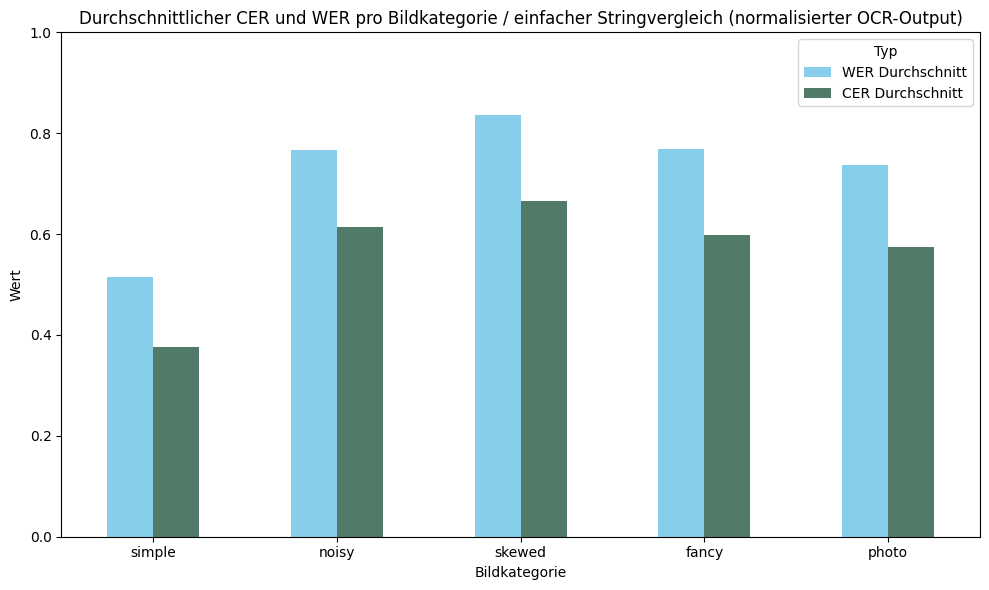

In [155]:
import matplotlib.pyplot as plt
import pandas as pd


categories = ['simple', 'noisy', 'skewed', 'fancy', 'photo']

# Mittelwerte berechnen
WER_by_category = df.groupby("category")["wer02"].mean() 
CER_by_category = df.groupby("category")["cer02"].mean() 


# Zusammenführen zu einem DataFrame
df_combined = pd.DataFrame({
    "WER Durchschnitt": WER_by_category,
    "CER Durchschnitt": CER_by_category   
})

df_combined = df_combined.loc[categories]

farben = ["skyblue", "#527a68"]

# Plot
ax = df_combined.plot(kind="bar", figsize=(10, 6), color=farben)
plt.title("Durchschnittlicher CER und WER pro Bildkategorie / einfacher Stringvergleich (normalisierter OCR-Output)")
plt.ylabel("Wert")
plt.xlabel("Bildkategorie")
plt.xticks(rotation=0)
plt.legend(title="Typ")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



In [157]:
df.to_csv("../../data/OCR/tesseract/tesseract_results_string_psm3.csv", index=False)